In [166]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np

### Basic Image Manipulation

Below, we load an image located on the web and show the image.  First we create a variable that retrieves the image from any given url:  

```python
response = requests.get("http://efdreams.com/data_images/dreams/lion/lion-03.jpg")
```

Then we open the image:

```python
img = Image.open(BytesIO(response.content))
```

Finally, we show the image.  If you want it to pop out in a separate windowuse the `show` command.

```python
img.show()
img
```

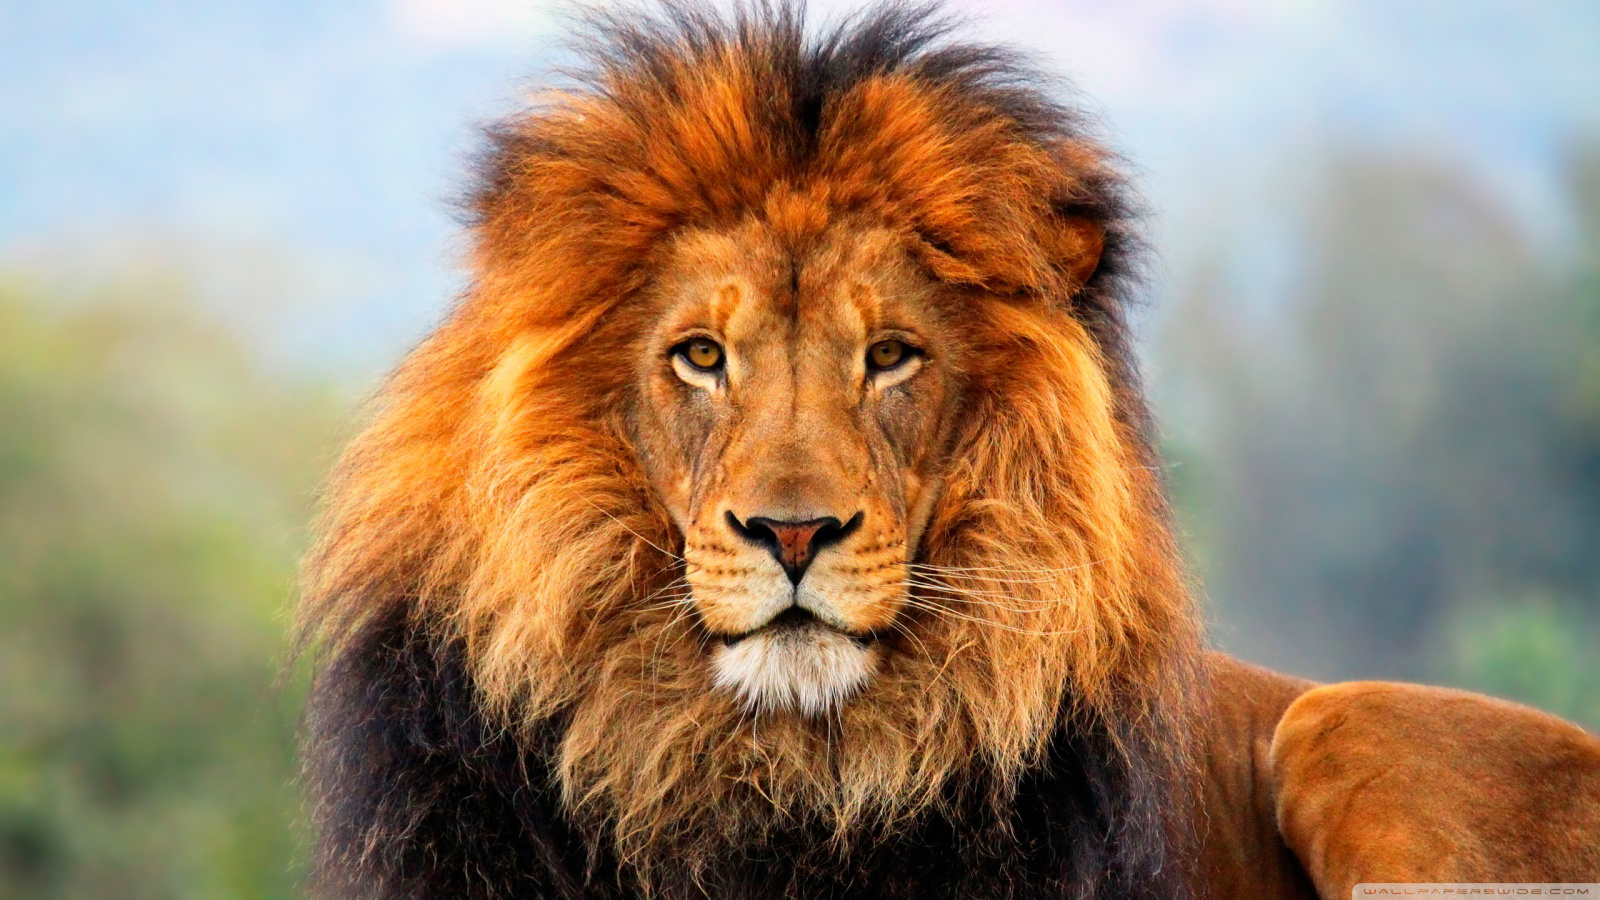

In [154]:
response = requests.get("http://efdreams.com/data_images/dreams/lion/lion-03.jpg")
img = Image.open(BytesIO(response.content))
img

We import the future module and retrieve some basic information about the nature and size of the image.

```python
print(im.format, im.size, im.mode)
```

In [145]:
from future import *

In [146]:
print(img.format, img.size, img.mode)

JPEG (1600, 900) RGB


### Crop and Paste

The size of the image refers to an upper lefthand corner coordinate of $(0,0)$ and bottom right coordinate of $(300, 168)$.  We can then create a piece of the picture using different coordinates, and crop that picture.

Next, we can take these slices and paste them on the original image.

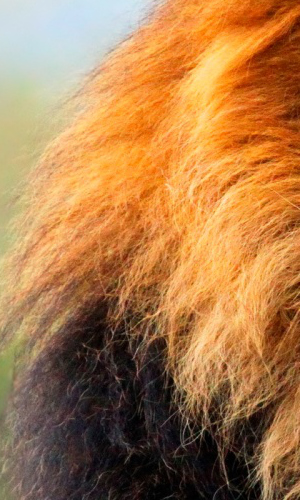

In [147]:
box1 = (300, 300, 600, 800)
cropped1 = img.crop(box1)
cropped1

In [148]:
box2 = (0, 0, 150, 84)
cropped2 = img.crop(box)

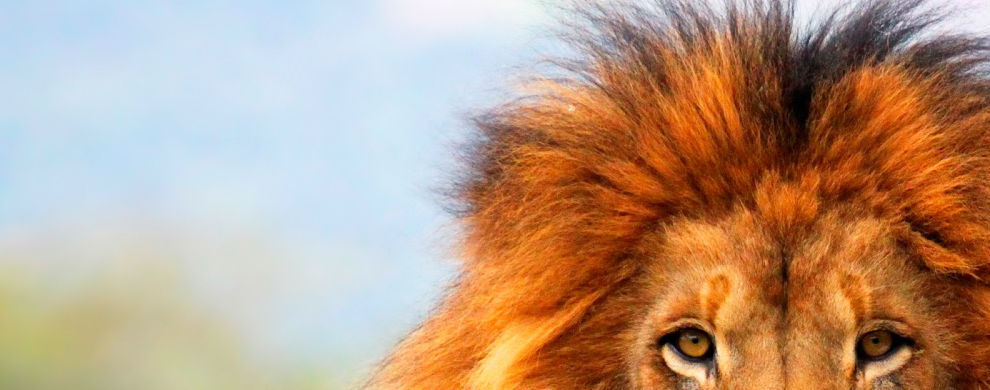

In [149]:
cropped2

In [150]:
box = (10, 10 , 1000, 400)
region = img.crop(box)

In [151]:
region = region.transpose(Image.ROTATE_180)

In [152]:
img.paste(region, box)

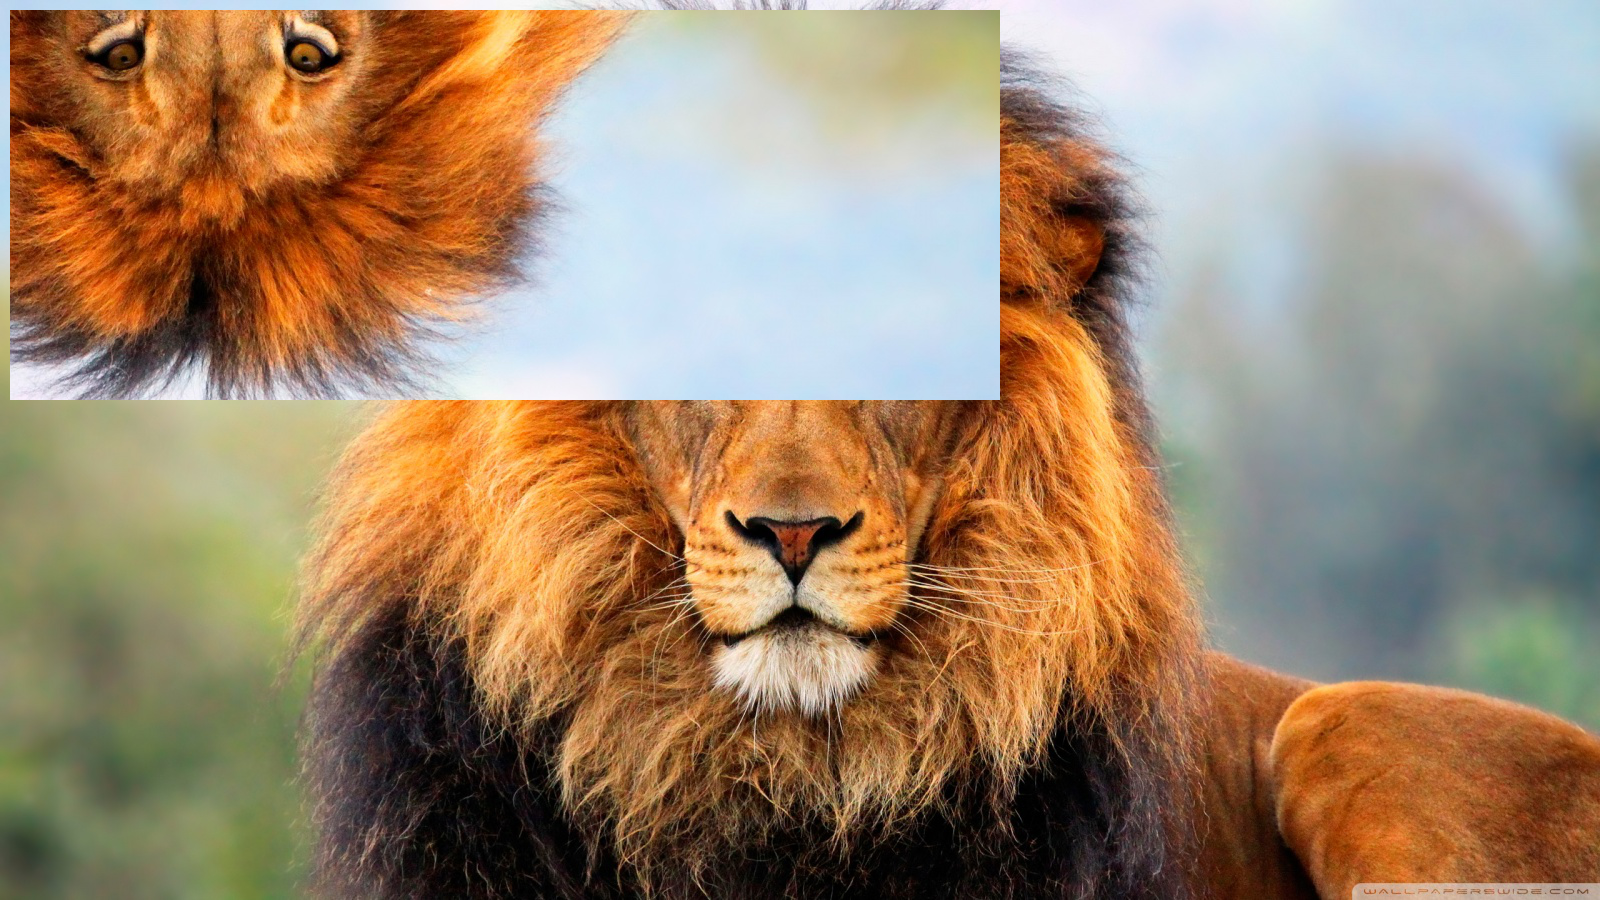

In [153]:
img

### Scipy

There seem to be some more options available in the scipy  library.  I like this because the matplotlib functions are familiar.  

In [157]:
from scipy import misc
f = misc.face()
misc.imsave('face.png', f)

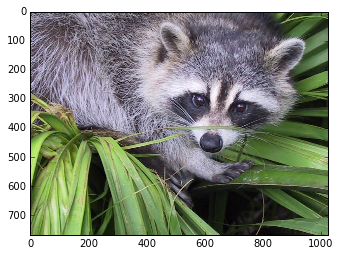

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [161]:
face = misc.imread('face.png')

In [162]:
type(face)

numpy.ndarray

In [163]:
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

In [164]:
face.tofile('face.raw')

In [167]:
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)

In [168]:
face_from_raw.shape

(2359296,)

In [169]:
face_from_raw.shape = (768, 1024, 3)

In [170]:
face_memmap = np.memmap('face.raw', dtype=np.uint8, shape=(768, 1024, 3))

In [171]:
for i in range(10):
    im = np.random.random_integers(0, 255, 10000).reshape((100, 100))
    misc.imsave('random_%02d.png' % i, im)

/Users/NYCMath/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 255 + 1) instead
  from ipykernel import kernelapp as app


In [172]:
from glob import glob

In [174]:
filelist = glob('random*.png')
filelist.sort()

In [175]:
f = misc.face(gray = True)

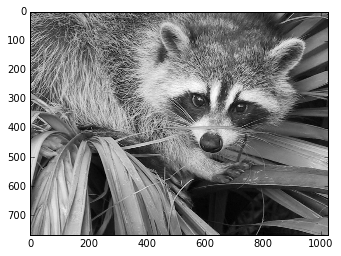

In [176]:
plt.imshow(f, cmap = plt.cm.gray)

([], <a list of 0 Text yticklabel objects>)

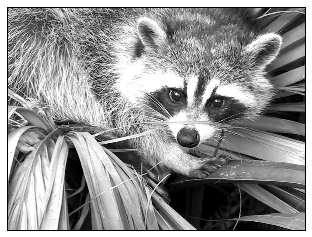

In [192]:
plt.imshow(f, cmap=plt.cm.gray, vmin=10, vmax=200)
plt.xticks([])
plt.yticks([])

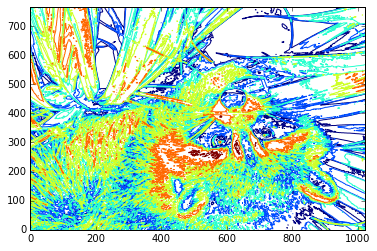

In [217]:
plt.contour(f) 

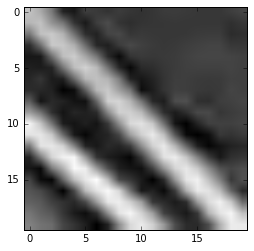

In [209]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray) 

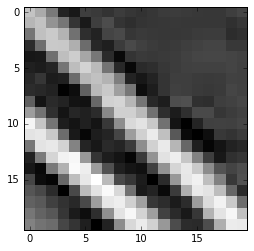

In [210]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')